------------------------------
#### understanding covariances
------------------------

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#### Co-variance

In [2]:
# Two variables
X = np.array([1, 2, 3, 4, 5])
Y = np.array([5, 4, 3, 2, 1])

In [3]:
# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [4]:
# Calculate deviations from means
deviations_X = X - mean_X
deviations_Y = Y - mean_Y

In [5]:
# Calculate covariance
covariance = np.mean(deviations_X * deviations_Y)

In [6]:
print("Variable X:", X)
print("Variable Y:", Y)
print("Mean of X:", mean_X)
print("Mean of Y:", mean_Y)
print("Deviations of X:", deviations_X)
print("Deviations of Y:", deviations_Y)
print("Covariance:", covariance)

Variable X: [1 2 3 4 5]
Variable Y: [5 4 3 2 1]
Mean of X: 3.0
Mean of Y: 3.0
Deviations of X: [-2. -1.  0.  1.  2.]
Deviations of Y: [ 2.  1.  0. -1. -2.]
Covariance: -2.0


#### Geometric intuition - COV

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

In [9]:
# Generate random data
n_samples = 50
mean = [0, 0]  # Mean of both variables
cov_positive = [[1, 0.8], [0.8, 1]]  # Positive covariance matrix
cov_negative = [[1, -0.8], [-0.8, 1]]  # Negative covariance matrix
cov_zero = [[1, 0], [0, 1]]  # Zero covariance matrix

In [10]:
# Generate data for each scenario
data_positive = np.random.multivariate_normal(mean, cov_positive, n_samples)
data_negative = np.random.multivariate_normal(mean, cov_negative, n_samples)
data_zero = np.random.multivariate_normal(mean, cov_zero, n_samples)

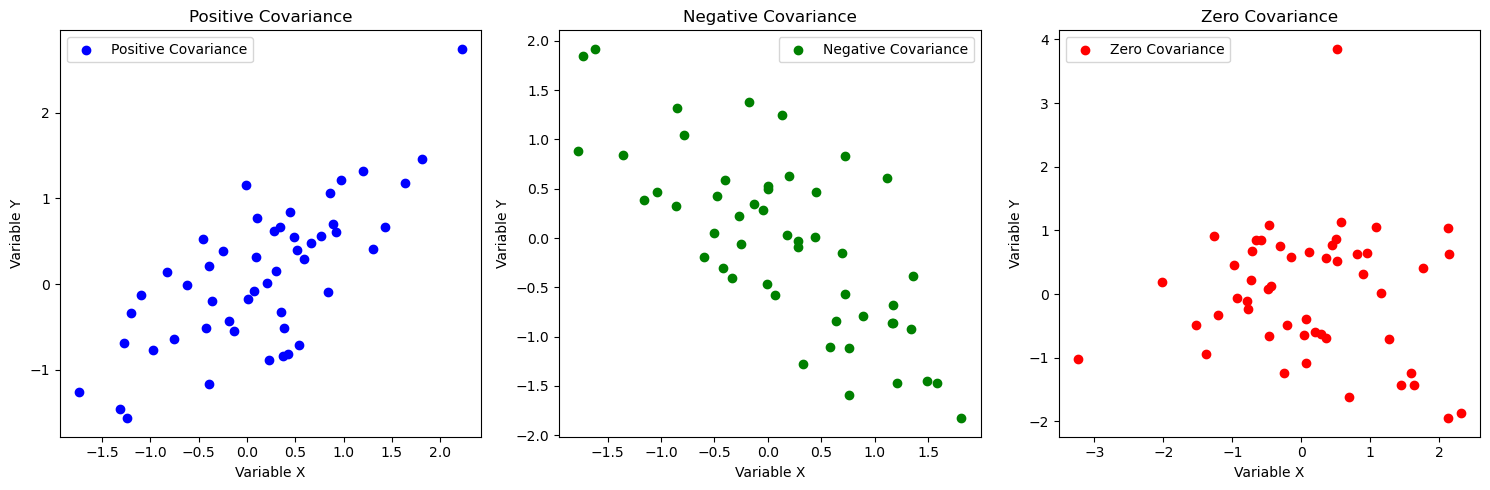

In [11]:
# Create scatter plots for each scenario
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(data_positive[:, 0], data_positive[:, 1], c='blue', label='Positive Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Positive Covariance')
plt.legend()

plt.subplot(132)
plt.scatter(data_negative[:, 0], data_negative[:, 1], c='green', label='Negative Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Negative Covariance')
plt.legend()

plt.subplot(133)
plt.scatter(data_zero[:, 0], data_zero[:, 1], c='red', label='Zero Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Zero Covariance')
plt.legend()

plt.tight_layout()

**Example - Geometric intuition on COV**

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [40]:
# negative COV
# data = np.array([[18, 5],
#                  [15, 11],
#                  [11, 13],
#                  [10, 16],
#                  [8, 14], 
#                  [5.5, 16]])

# positive COV
data = np.array([[5, 8],
                 [7, 11],
                 [11, 13],
                 [16, 16],
                 [18, 24], 
                 [23, 36]])

# No COV
# data = np.array([[5, 5],
#                  [7, 6.7],
#                  [11, 6.1],
#                  [16, 5.6],
#                  [18, 5.1], 
#                  [23, 6]])


In [41]:
data

array([[ 5,  8],
       [ 7, 11],
       [11, 13],
       [16, 16],
       [18, 24],
       [23, 36]])

In [42]:
np.mean(data[:, 0]), np.mean(data[:, 1])

(13.333333333333334, 18.0)

In [43]:
x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

In [44]:
x_bar, y_bar

(13.3333, 18.0)

In [45]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df

,x1,x2
0,5,8
1,7,11
2,11,13
3,16,16
4,18,24
5,23,36


In [46]:
df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar
df

,x1,x2,x1-mean,x2-mean
0,5,8,-8.3333,-10.0
1,7,11,-6.3333,-7.0
2,11,13,-2.3333,-5.0
3,16,16,2.6667,-2.0
4,18,24,4.6667,6.0
5,23,36,9.6667,18.0


In [47]:
df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)
df

,x1,x2,x1-mean,x2-mean,x1x2
0,5,8,-8.3333,-10.0,83.3330
1,7,11,-6.3333,-7.0,44.3331
2,11,13,-2.3333,-5.0,11.6665
3,16,16,2.6667,-2.0,-5.3334
4,18,24,4.6667,6.0,28.0002
5,23,36,9.6667,18.0,174.0006


In [48]:
np.sum(df.x1x2)/(df.shape[0]-1)

67.2

In [49]:
from matplotlib.patches import Rectangle

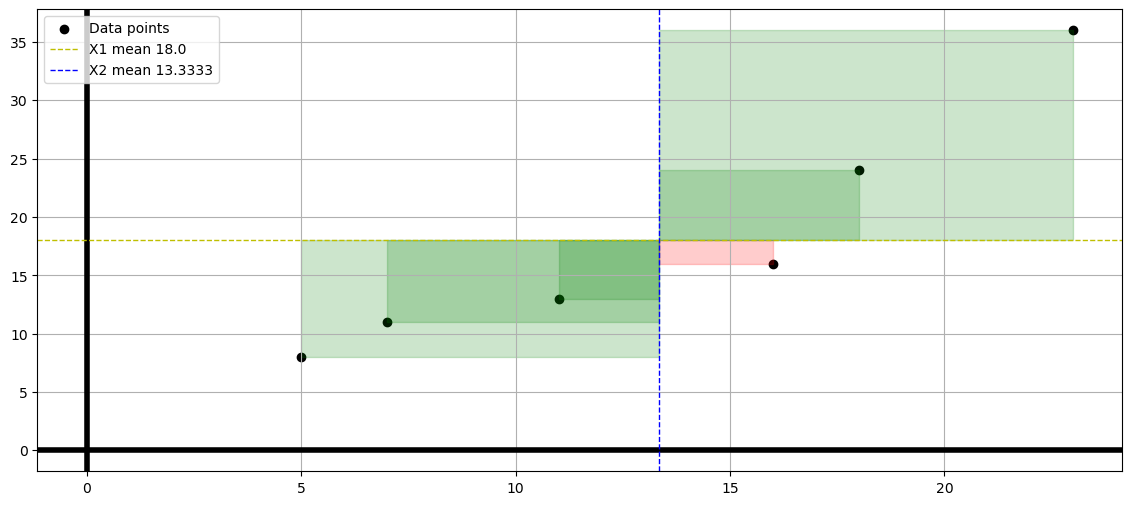

In [50]:
plt.figure(figsize=(14, 6))

ax = plt.gca()
plt.grid()

ax.axhline(linewidth=4, color='k')
ax.axvline(linewidth=4, color='k')

# plot the random number
ax.scatter(data[:, 0], data[:, 1], c='k', label='Data points')

ax.axhline(y= y_bar, linewidth=1, color='y', linestyle="--", label = 'X1 mean {}'.format((y_bar)))
ax.axvline(x= x_bar, linewidth=1, color='b', linestyle="--", label = 'X2 mean {}'.format((x_bar)))

# read all the data points
for idx, row in df.iterrows():
    someX, someY = row.x1, row.x2
    
    dist_x_bar  = someX - x_bar
    dist_y_bar  = someY - y_bar
    
    # positive or negative relation
    if dist_x_bar * dist_y_bar < 0:
        fill_color = ['red']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='r', alpha=.2))
    else:
        fill_color = ['green']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='g', alpha=.2))
            
ax.legend();